In [25]:
import sys
sys.path.append('../../lib')

In [ ]:
!curl -O https://storage.googleapis.com/properati-data-public/ar_properties.csv.gz
!gunzip ar_properties.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
 13  289M   13 39.8M    0     0  2588k      0  0:01:54  0:00:15  0:01:39 2709k

In [2]:
!wc -l ar_properties.csv

 5688795 ar_properties.csv


In [4]:
!head -n 100000 ar_properties.csv > ar_properties.sample.csv

In [1]:
import pandas as pd
pd.options.display.max_columns = 1000
pd.options.display.max_colwidth = 1000

In [2]:
df = pd.read_csv('ar_properties.csv')

In [3]:
df.head()

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,DyVXfkpKygVBKuUk5olH+A==,Propiedad,2020-08-22,2020-09-03,2020-08-22,-34.407468,-58.957367,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,NaN,NaN,NaN,NaN,133139.0,NaN,NaN,NaN,Mensual,VENTA - Lote Industrial 130.000m2 - Parque Industrial Pilar,"Lote (Nro.50) mide 133.139 m2\n<br>Valor: U$S (CONSULTAR)\n<br>\n<br>(Nuevo) PLAZA INDUSTRIAL PILAR (Anexo) del Parque Industrial Pilar.\n<br>El predio cuenta con 200 HA ofreciendo LOTES que van desde los 5.000 hasta 300.000m2.\n<br> FOS: 0.5 / FOT: 1\n<br> Zonificación Industrial (Categoría: 1, 2 y 3).\n<br> Desagues Pluviales\n<br> Tendido Red Eléctrica\n<br> Alumbrado Led de calles\n<br>Sobre Av. Arturo Frondizi entre (Calles 10 y 12), con acceso directo a la Au. Panamericana Ramal Pilar (Ruta 8, Km 61).\n<br>\n<br>CONSULTAR: Depósitos/Locales Llave en Mano (150 a los 1.000m2).\n<br>CONSULTAR: Disponibilidad y Financiamiento.<br><br>Martillero y Corredor Inmobiliario: <br>Walter Angel Tomé<br>CMCPSI 5200 <br>Todas las propiedades son tasadas y bajo normas establecidas en la ley publicamos las propiedades para su comercialización.<br>La intermediación y la conclusión de las operaciones son actividades exclusivas de este matriculado.",Lote,Venta
1,9naojilaMecJN4jlQiTkGg==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-37.996039,-57.542509,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,NaN,NaN,NaN,8.0,NaN,NaN,687.0,687.0,NaN,NaN,Mensual,Casa - Santa Cecilia,"Conjunto edilicio de casa y departamentos en block. Casona de 1930, restaurada, con vista al mar. A 30 mts de la costa, cerca de peatonal San Martín y otros puntos turísticos. <br><br>Apto para:<br>1. Vivienda familiar + uso de oficinas dentro del mismo edificio.<br>2. Uso profesional (consultorios, oficinas)<br>3. Alquiler de habitaciones tipo hostel o apart.<br>4. Apto para demoler y construir.<br><br>DETALLES:<br><br>P.B: Espacios comunes, 100 m2. Ingreso, cochera p/3 autos, lavadero, depósito, baño, parque de 134 m2 con parrilla, doble quincho, piscina para niños.<br><br>PRIMER PISO: Dos deptos con vista al mar (opción unificable para armar un único piso) con detalles de calidad, pinotea, piedra, etc.<br>Al frente, dos grandes amb con dormitorios, cocina com, gran living com/recepción, gran tarima de madera de primera, hogar y leñera, catarata decorativa, baño completo, balcón a la calle (89 m2)<br>Al parque, depto de living, cocina grande con balcón terraza (43 m2), dor...",Otro,Venta
2,tlCPRJPjoDEUzuuCelemAQ==,Propiedad,2020-08-22,2020-08-31,2020-08-22,-31.380187,-58.009182,Argentina,Entre Ríos,Concordia,NaN,NaN,NaN,2.0,1.0,1.0,80.0,80.0,NaN,NaN,Mensual,Casa - Concordia,"Casa de un dormitorio, cocina, baño, living comedor, lavadero, patio y cochera para un auto bajo techo. No posee Gas Natural y es apto para mascotas, disponible a partir de septiembre",Casa,Alquiler
3,Zw3b91glQUO3HNrM5fPYlQ==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-27.494106,-55.123455,Argentina,Misiones,Oberá,NaN,NaN,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,Mensual,Terreno - Obera,"IMPORTANTE PROPIEDAD EN VENTA EN OBERA MISIONES<br>Gran terreno de 20 m de frente por 50 m de fondo, con construcción a terminar, posee un depto en pb. de 1 dormitorio, coc-comedor y baño. y un tipo duplex de 1 dormitorio, cocina comedor, baño y balcón.<br>Ubicado sobre calle Paraguay casi Misiones de la ciudad de Obera. Se encuentra en una zona linda en crecimiento, a 7 cuadras aprox. del centro y a 4 cuadras de la terminal nueva.<br>CONSULTE PRECIO!!!<br><br>Para Mayor información Comunicarse con SILARQ Arquitectura + Inmobiliaria. Sito en Av. Lopez Torres 5467 Pdas-Mnes, al Cel/Wapp: 3764866218, mail: o en nuestra web. site [(código_referencia)]",Lote,Venta
4,bsU81gm9JEgtZCbTYgvykg==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-32.948856,-60.630464,Argentina,Santa Fe,Rosario,NaN,NaN,N

In [4]:
df.value_counts('operation_type')

operation_type
Venta                750831
Alquiler             207490
Alquiler temporal     41679
dtype: int64

In [5]:
df.value_counts('l2')

l2
Capital Federal                 265125
Bs.As. G.B.A. Zona Norte        184310
Bs.As. G.B.A. Zona Sur          131431
Santa Fe                         91565
Bs.As. G.B.A. Zona Oeste         76786
Buenos Aires Costa Atlántica     73759
Córdoba                          66274
Buenos Aires Interior            23975
Neuquén                          15487
Mendoza                           9172
Río Negro                         7935
Maldonado                         7784
Entre Ríos                        6750
Tucumán                           6531
Salta                             6056
Montevideo                        5909
Misiones                          4516
San Luis                          2654
Chaco                             1716
La Pampa                          1660
Corrientes                        1573
Chubut                            1529
San Juan                          1390
Colonia                           1213
Canelones                          720
Jujuy                 

In [6]:
df = df[df.l2 == "Capital Federal"]

In [7]:
df.value_counts('operation_type')

operation_type
Venta                183810
Alquiler              67177
Alquiler temporal     14138
dtype: int64

In [8]:
df = df[df.operation_type == 'Venta']

In [10]:
df['l4'].dropna()

165       Palermo Hollywood
201       Palermo Hollywood
203            Palermo Soho
254            Palermo Soho
307           Palermo Chico
                ...        
999271        Palermo Chico
999272        Palermo Chico
999701        Palermo Chico
999703        Palermo Chico
999917        Palermo Chico
Name: l4, Length: 7263, dtype: object

In [11]:
df = df.dropna(subset=['price'])

In [12]:
df = df[df.price > 0]

/Users/przivic/miniconda3/envs/mlp2022/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

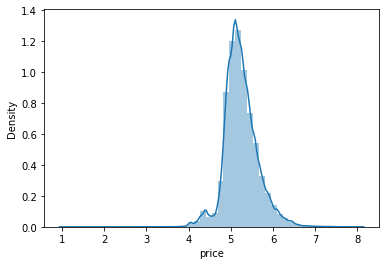

In [14]:
import numpy as np
import seaborn as sns

sns.distplot(np.log10(df.price))

In [15]:
df = df[df.price > 1e4]
df = df[df.price < 1e7]

/Users/przivic/miniconda3/envs/mlp2022/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

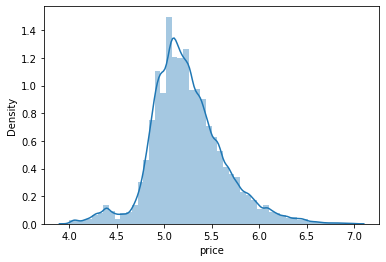

In [16]:
sns.distplot(np.log10(df.price))

<AxesSubplot:>

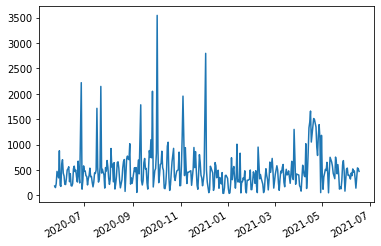

In [60]:
import matplotlib.pyplot as plt
from datetime import datetime
from collections import Counter

created_on = df.created_on.apply(lambda e: datetime.strptime(e, '%Y-%m-%d'))
created_on.value_counts().sort_index().plot()

In [61]:
cut = '2021-05-01'
len(df[df.created_on > cut]) / len(df)

0.10265387227126493

In [62]:
docs = df.to_dict(orient='records')

train_docs, test_docs = [], []
for doc in docs:
    l = train_docs if doc['created_on'] <= cut else test_docs
    l.append(doc)

In [63]:
len(train_docs), len(test_docs)

(161219, 18443)

In [64]:
from taller_model_selection.serialize import write_jl

In [65]:
def make_Xy(docs):
    y = [e.pop('price') for e in docs]
    return docs, y

In [66]:
X_train, y_train = make_Xy(train_docs)

In [67]:
X_test, y_test = make_Xy(test_docs)

In [68]:
write_jl(X_train, 'X_train.jl')
write_jl(y_train, 'y_train.jl')
write_jl(X_test, 'X_test.jl')
write_jl(y_test, 'y_test.jl')